In [1]:
#Load Libraries
import numpy as np
import pandas as pd
import os
import ggplot
from fancyimpute import KNN  
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import chi2_contingency
import seaborn as sns;sns.set()
from random import randrange, uniform
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression

C:\Users\DELL\Miniconda3\lib\site-packages\ggplot\utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
C:\Users\DELL\Miniconda3\lib\site-packages\ggplot\stats\smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
C:\Users\DELL\Miniconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
C:\Users\DELL\Miniconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from

In [2]:
#Set working directory
os.chdir("C:/Users/DELL/Desktop/data01s2l1")

In [3]:
# Load dataset
df = pd.read_csv("C:/Users/DELL/Desktop/edwisor/project1/Absenteeism_at_work_Project.csv",encoding='latin-1') 

In [4]:
#structure of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
ID                                 740 non-null int64
Reason for absence                 737 non-null float64
Month of absence                   739 non-null float64
Day of the week                    740 non-null int64
Seasons                            740 non-null int64
Transportation expense             733 non-null float64
Distance from Residence to Work    737 non-null float64
Service time                       737 non-null float64
Age                                737 non-null float64
Work load Average/day              730 non-null object
Hit target                         734 non-null float64
Disciplinary failure               734 non-null float64
Education                          730 non-null float64
Son                                734 non-null float64
Social drinker                     737 non-null float64
Social smoker                      736 non-null float64
Pet   

In [5]:
#Rename variables
df=df.rename(columns={'Disciplinary failure':'DisciplinaryFailure','Social drinker':'SocialDrinker','Social smoker':'SocialSmoker','Absenteeism time in hours':'AbsenteeismTimeInHours','Reason for absence':'ReasonForAbsence','Month of absence':'MonthOfAbsence','Day of the week':'DayoftheWeek','Transportation expense':'TransportationExpense','Distance from Residence to Work':'DistanceFromResidenceToWork','Service time':'ServiceTime','Work load Average/day ':'WorkLoadAveragePerDay','Hit target':'HitTarget','Body mass index':'BodyMassIndex'})

In [6]:
df.head()

,ID,ReasonForAbsence,MonthOfAbsence,DayoftheWeek,Seasons,TransportationExpense,DistanceFromResidenceToWork,ServiceTime,Age,WorkLoadAveragePerDay,...,DisciplinaryFailure,Education,Son,SocialDrinker,SocialSmoker,Pet,Weight,Height,BodyMassIndex,AbsenteeismTimeInHours
0,11,26.0,7.0,3,1,289.0,36.0,13.0,33.0,"239,554",...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.0
1,36,0.0,7.0,3,1,118.0,13.0,18.0,50.0,"239,554",...,1.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0,0.0
2,3,23.0,7.0,4,1,179.0,51.0,18.0,38.0,"239,554",...,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0
3,7,7.0,7.0,5,1,279.0,5.0,14.0,39.0,"239,554",...,0.0,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.0,4.0
4,11,23.0,7.0,5,1,289.0,36.0,13.0,33.0,"239,554",...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,2.0


In [7]:
#Convert Work load Average/ day in float
df.WorkLoadAveragePerDay=df['WorkLoadAveragePerDay'].replace({",":""},regex=True)
df.WorkLoadAveragePerDay=pd.to_numeric(df['WorkLoadAveragePerDay'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
ID                             740 non-null int64
ReasonForAbsence               737 non-null float64
MonthOfAbsence                 739 non-null float64
DayoftheWeek                   740 non-null int64
Seasons                        740 non-null int64
TransportationExpense          733 non-null float64
DistanceFromResidenceToWork    737 non-null float64
ServiceTime                    737 non-null float64
Age                            737 non-null float64
WorkLoadAveragePerDay          730 non-null float64
HitTarget                      734 non-null float64
DisciplinaryFailure            734 non-null float64
Education                      730 non-null float64
Son                            734 non-null float64
SocialDrinker                  737 non-null float64
SocialSmoker                   736 non-null float64
Pet                            738 non-null float64
Weight           

In [9]:
#Missing Data Analysis

missing_val=pd.DataFrame(df.isnull().sum())


In [10]:
missing_val

,0
ID,0
ReasonForAbsence,3
MonthOfAbsence,1
DayoftheWeek,0
Seasons,0
TransportationExpense,7
DistanceFromResidenceToWork,3
ServiceTime,3
Age,3
WorkLoadAveragePerDay,10


In [11]:
#We are interested in only absenteeism. Dropping missing/zero values from target variable
drop_A=df.index[df["AbsenteeismTimeInHours"] == 0.0].tolist()
drop_A

[1,
 51,
 54,
 58,
 134,
 203,
 213,
 214,
 216,
 251,
 273,
 276,
 277,
 285,
 293,
 294,
 300,
 303,
 311,
 312,
 325,
 336,
 400,
 406,
 407,
 446,
 530,
 548,
 549,
 688,
 690,
 714,
 715,
 737,
 738,
 739]

In [12]:
df=df.drop(df.index[drop_A])
df = df.dropna(subset=['AbsenteeismTimeInHours'])

In [13]:
#Check if null remaining in target variable
df["AbsenteeismTimeInHours"].isnull().sum()

0

In [14]:
df.head()

,ID,ReasonForAbsence,MonthOfAbsence,DayoftheWeek,Seasons,TransportationExpense,DistanceFromResidenceToWork,ServiceTime,Age,WorkLoadAveragePerDay,...,DisciplinaryFailure,Education,Son,SocialDrinker,SocialSmoker,Pet,Weight,Height,BodyMassIndex,AbsenteeismTimeInHours
0,11,26.0,7.0,3,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.0
2,3,23.0,7.0,4,1,179.0,51.0,18.0,38.0,239554.0,...,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0
3,7,7.0,7.0,5,1,279.0,5.0,14.0,39.0,239554.0,...,0.0,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.0,4.0
4,11,23.0,7.0,5,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,2.0
6,10,22.0,7.0,6,1,NaN,52.0,3.0,28.0,239554.0,...,0.0,1.0,1.0,1.0,0.0,4.0,80.0,172.0,27.0,8.0


In [15]:
#Missing Value Imputation
#create missing value

#Actual Value 11
#Mean 20.38
#Median 23
#KNN 11

#df['ReasonForAbsence'].loc[17] = np.nan

#Median
df['ReasonForAbsence'].median()

23.0

In [16]:
#Mean
df['ReasonForAbsence'].mean()

20.382916053019144

In [17]:
df['ReasonForAbsence'].loc[17]


21.0

In [18]:
#KNN imputation
#Assigning levels to the categories
lis = []
for i in range(0, df.shape[1]):
    #print(i)
    if(df.iloc[:,i].dtypes == 'object'):
        df.iloc[:,i] = pd.Categorical(df.iloc[:,i])
        #print(marketing_train[[i]])
        df.iloc[:,i] = df.iloc[:,i].cat.codes 
        df.iloc[:,i] = df.iloc[:,i].astype('object')
        
        lis.append(df.columns[i])

In [19]:
df.head()

,ID,ReasonForAbsence,MonthOfAbsence,DayoftheWeek,Seasons,TransportationExpense,DistanceFromResidenceToWork,ServiceTime,Age,WorkLoadAveragePerDay,...,DisciplinaryFailure,Education,Son,SocialDrinker,SocialSmoker,Pet,Weight,Height,BodyMassIndex,AbsenteeismTimeInHours
0,11,26.0,7.0,3,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.0
2,3,23.0,7.0,4,1,179.0,51.0,18.0,38.0,239554.0,...,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0
3,7,7.0,7.0,5,1,279.0,5.0,14.0,39.0,239554.0,...,0.0,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.0,4.0
4,11,23.0,7.0,5,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,2.0
6,10,22.0,7.0,6,1,NaN,52.0,3.0,28.0,239554.0,...,0.0,1.0,1.0,1.0,0.0,4.0,80.0,172.0,27.0,8.0


In [20]:
#replace -1 with NA to impute
for i in range(0, df.shape[1]):
    df.iloc[:,i] = df.iloc[:,i].replace(-1, np.nan)

In [21]:
#Apply KNN imputation algorithm
df = pd.DataFrame(KNN(k = 5).fit_transform(df), columns = df.columns)

Imputing row 1/682 with 0 missing, elapsed time: 0.260
Imputing row 101/682 with 2 missing, elapsed time: 0.469
Imputing row 201/682 with 0 missing, elapsed time: 0.475
Imputing row 301/682 with 0 missing, elapsed time: 0.476
Imputing row 401/682 with 0 missing, elapsed time: 0.478
Imputing row 501/682 with 0 missing, elapsed time: 0.479
Imputing row 601/682 with 0 missing, elapsed time: 0.481


In [22]:
df.head(20)

,ID,ReasonForAbsence,MonthOfAbsence,DayoftheWeek,Seasons,TransportationExpense,DistanceFromResidenceToWork,ServiceTime,Age,WorkLoadAveragePerDay,...,DisciplinaryFailure,Education,Son,SocialDrinker,SocialSmoker,Pet,Weight,Height,BodyMassIndex,AbsenteeismTimeInHours
0,11.0,26.0,7.0,3.0,1.0,289.000000,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.000000,4.0
1,3.0,23.0,7.0,4.0,1.0,179.000000,51.0,18.0,38.0,239554.0,...,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.000000,2.0
2,7.0,7.0,7.0,5.0,1.0,279.000000,5.0,14.0,39.0,239554.0,...,0.0,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.000000,4.0
3,11.0,23.0,7.0,5.0,1.0,289.000000,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.000000,2.0
4,10.0,22.0,7.0,6.0,1.0,323.142265,52.0,3.0,28.0,239554.0,...,0.0,1.0,1.0,1.0,0.0,4.0,80.0,172.0,27.000000,8.0
5,20.0,23.0,7.0,6.0,1.0,260.000000,50.0,11.0,36.0,239554.0,...,0.0,1.0,4.0,1.0,0.0,0.0,65.0,168.0,23.000000,4.0
6,14.0,19.0,7.0,2.0,1.0,155.000000,12.0,14.0,34.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,0.0,95.0,196.0,25.000000,40.0
7,1.0,22.0,7.0,2.0,1.0,235.000000,11.0,14.0,37.0,239554.0,...,0.0,3.0,1.0,0.0,0.0,1.0,88.0,172.0,29.000000,8.0
8,20.0,1.0,7.0,2.0,1.0,260.000000,50.0,11.0,36.0,239554.0,...,0.0,1.0,4.0,1.0,0.0,0.0,65.0,168.0,23.000000,8.0
9,20.0,1.0,7.0,3.0,1.0,260.000000,50.0,11.0,36.0,239554.0,...,0.0,1.0,4.0,1.0,0.0,0.0,65.0,168.0,23.000000,8.0


C:\Users\DELL\Miniconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


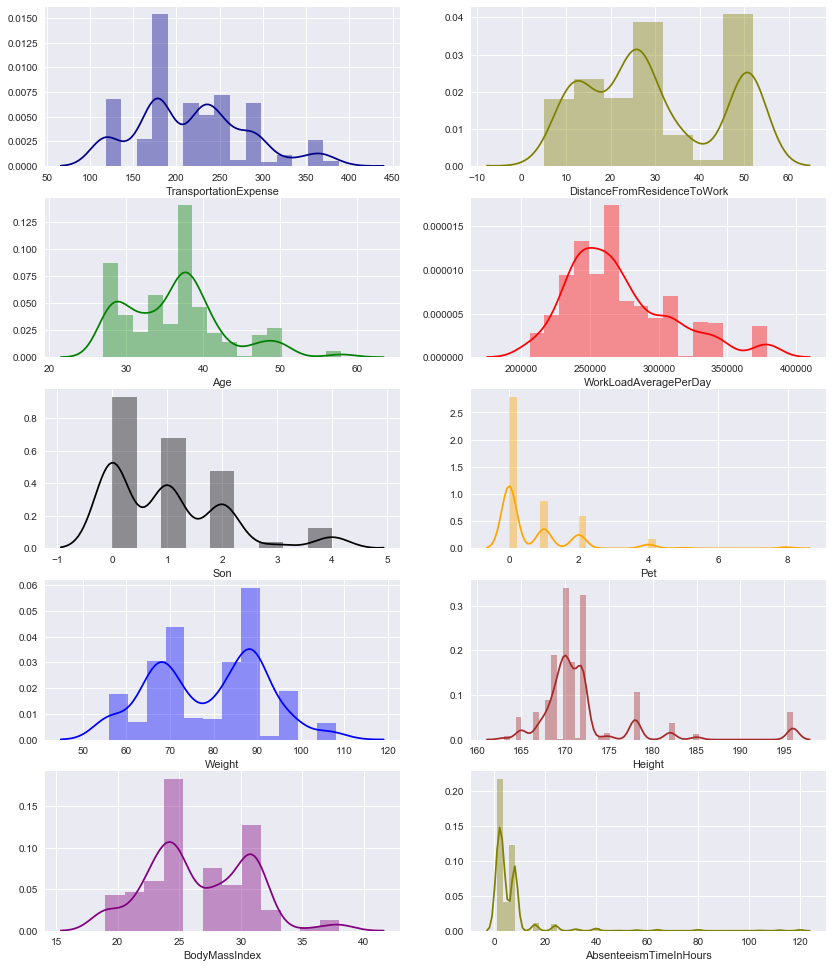

In [23]:
# KDE plot for continuous variables
f, axes = plt.subplots(5, 2, figsize=(14, 17))
sns.distplot( df["TransportationExpense"] , color="darkblue", ax=axes[0, 0])
sns.distplot( df["DistanceFromResidenceToWork"] , color="olive", ax=axes[0, 1])
sns.distplot( df["Age"] , color="green", ax=axes[1, 0])
sns.distplot( df["WorkLoadAveragePerDay"] , color="red", ax=axes[1, 1])
sns.distplot( df["Son"] , color="black", ax=axes[2, 0])
sns.distplot( df["Pet"] , color="orange", ax=axes[2, 1])
sns.distplot( df["Weight"] , color="blue", ax=axes[3, 0])
sns.distplot( df["Height"] , color="brown", ax=axes[3, 1])
sns.distplot( df["BodyMassIndex"] , color="purple", ax=axes[4, 0])
sns.distplot( df["AbsenteeismTimeInHours"] , color="olive", ax=axes[4, 1])

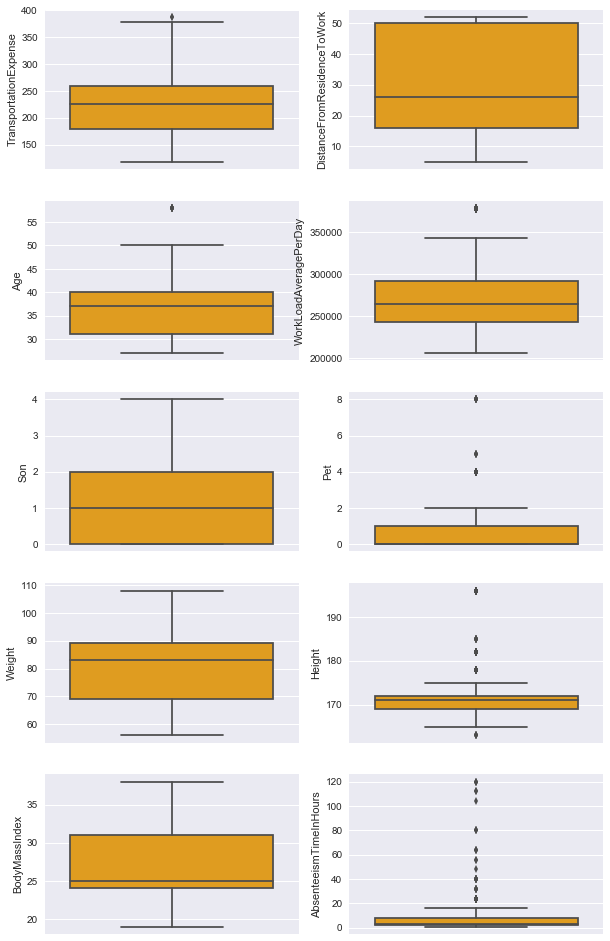

In [24]:
f, axes = plt.subplots(5, 2, figsize=(10, 17))
sns.boxplot( y=df["TransportationExpense"] , color="orange", ax=axes[0, 0])
sns.boxplot( y=df["DistanceFromResidenceToWork"] , color="orange", ax=axes[0, 1])
sns.boxplot( y=df["Age"] , color="orange", ax=axes[1, 0])
sns.boxplot( y=df["WorkLoadAveragePerDay"] , color="orange", ax=axes[1, 1])
sns.boxplot( y=df["Son"] , color="orange", ax=axes[2, 0])
sns.boxplot( y=df["Pet"] , color="orange", ax=axes[2, 1])
sns.boxplot( y=df["Weight"] , color="orange", ax=axes[3, 0])
sns.boxplot( y=df["Height"] , color="orange", ax=axes[3, 1])
sns.boxplot( y=df["BodyMassIndex"] , color="orange", ax=axes[4, 0])
sns.boxplot( y=df["AbsenteeismTimeInHours"] , color="orange", ax=axes[4, 1])

In [25]:
# #Detect and delete outliers from data
cnames =  ["TransportationExpense", "DistanceFromResidenceToWork", "ServiceTime", "Age", "WorkLoadAveragePerDay", "HitTarget", "Weight", "Height",
           "BodyMassIndex","Son","Pet"]
for i in cnames:
     print(i)
     q75, q25 = np.percentile(df.loc[:,i], [75 ,25])
     iqr = q75 - q25

     min = q25 - (iqr*1.5)
     max = q75 + (iqr*1.5)
     print(min)
     print(max)

TransportationExpense
57.5
381.5
DistanceFromResidenceToWork
-35.0
101.0
ServiceTime
-1.5
26.5
Age
17.5
53.5
WorkLoadAveragePerDay
170281.38266727526
364832.77039963484
HitTarget
87.0
103.0
Weight
39.0
119.0
Height
164.5
176.5
BodyMassIndex
13.5
41.5
Son
-3.0
5.0
Pet
-1.5
2.5


In [26]:
#Detect and replace with NA
# #Extract quartiles
Heightq75, Heightq25 = np.percentile(df['Height'], [75 ,25])
HitTargetq75, HitTargetq25 = np.percentile(df['HitTarget'], [75 ,25])
Ageq75, Ageq25 = np.percentile(df['Age'], [75 ,25])
ServiceTimeq75, ServiceTimeq25 = np.percentile(df['ServiceTime'], [75 ,25])
TransportationExpenseq75, TransportationExpenseq25 = np.percentile(df['TransportationExpense'], [75 ,25])
AbsenteeismTimeInHoursq75, AbsenteeismTimeInHoursq25 = np.percentile(df['AbsenteeismTimeInHours'], [75 ,25])
Sonq75, Sonq25 = np.percentile(df['Son'], [75 ,25])
Petq75, Petq25 = np.percentile(df['Pet'], [75 ,25])

# #Calculate IQR
Heightiqr = Heightq75 - Heightq25
HitTargetiqr = HitTargetq75 - HitTargetq25
Ageiqr = Ageq75 - Ageq25
ServiceTimeiqr = ServiceTimeq75 - ServiceTimeq25
TransportationExpenseiqr = TransportationExpenseq75 - TransportationExpenseq25
AbsenteeismTimeInHoursiqr = AbsenteeismTimeInHoursq75 - AbsenteeismTimeInHoursq25
Soniqr = Sonq75 - Sonq25
Petiqr = Petq75 - Petq25

# #Calculate inner and outer fence
Heightminimum = Heightq25 - (Heightiqr*1.5)
Heightmaximum = Heightq75 + (Heightiqr*1.5)
HitTargetminimum = HitTargetq25 - (HitTargetiqr*1.5)
HitTargetmaximum = HitTargetq75 + (HitTargetiqr*1.5)
Ageminimum = Ageq25 - (Ageiqr*1.5)
Agemaximum = Ageq75 + (Ageiqr*1.5)
ServiceTimeminimum = ServiceTimeq25 - (ServiceTimeiqr*1.5)
ServiceTimemaximum = ServiceTimeq75 + (ServiceTimeiqr*1.5)
TransportationExpenseminimum = TransportationExpenseq25 - (TransportationExpenseiqr*1.5)
TransportationExpensemaximum = TransportationExpenseq75 + (TransportationExpenseiqr*1.5)
AbsenteeismTimeInHoursminimum = AbsenteeismTimeInHoursq25 - (AbsenteeismTimeInHoursiqr*1.5)
AbsenteeismTimeInHoursmaximum = AbsenteeismTimeInHoursq75 + (AbsenteeismTimeInHoursiqr*1.5)
Sonminimum = Sonq25 - (Soniqr*1.5)
Sonmaximum = Sonq75 + (Soniqr*1.5)
Petminimum = Petq25 - (Petiqr*1.5)
Petmaximum = Petq75 + (Petiqr*1.5)

# #Replace with NA
df.loc[df['Height'] < Heightminimum,:'Height'] = np.nan
df.loc[df['Height'] > Heightmaximum,:'Height'] = np.nan
df.loc[df['HitTarget'] < HitTargetminimum,:'HitTarget'] = np.nan
df.loc[df['HitTarget'] > HitTargetmaximum,:'HitTarget'] = np.nan
df.loc[df['Age'] < Ageminimum,:'Age'] = np.nan
df.loc[df['Age'] > Agemaximum,:'Age'] = np.nan
df.loc[df['ServiceTime'] < ServiceTimeminimum,:'ServiceTime'] = np.nan
df.loc[df['ServiceTime'] > ServiceTimemaximum,:'ServiceTime'] = np.nan
df.loc[df['TransportationExpense'] < TransportationExpenseminimum,:'TransportationExpense'] = np.nan
df.loc[df['TransportationExpense'] > TransportationExpensemaximum,:'TransportationExpense'] = np.nan
df.loc[df['AbsenteeismTimeInHours'] < AbsenteeismTimeInHoursminimum,:'AbsenteeismTimeInHours'] = np.nan
df.loc[df['AbsenteeismTimeInHours'] > AbsenteeismTimeInHoursmaximum,:'AbsenteeismTimeInHours'] = np.nan
df.loc[df['Son'] < Sonminimum,:'Son'] = np.nan
df.loc[df['Son'] > Sonmaximum,:'Son'] = np.nan
df.loc[df['Pet'] < Petminimum,:'Pet'] = np.nan
df.loc[df['Pet'] > Petmaximum,:'Pet'] = np.nan
# #Calculate missing value
missing_val = pd.DataFrame(df.isnull().sum())
missing_val

# #Impute with KNN
df = pd.DataFrame(KNN(k = 3).fit_transform(df), columns = df.columns)

Imputing row 1/682 with 0 missing, elapsed time: 0.219
Imputing row 101/682 with 0 missing, elapsed time: 0.228
Imputing row 201/682 with 21 missing, elapsed time: 0.238
Imputing row 301/682 with 21 missing, elapsed time: 0.254
Imputing row 401/682 with 0 missing, elapsed time: 0.263
Imputing row 501/682 with 0 missing, elapsed time: 0.271
Imputing row 601/682 with 0 missing, elapsed time: 0.279
[KNN] Warning: 903/14322 still missing after imputation, replacing with 0


In [27]:
#Correlation Analysis
cnames =  ["TransportationExpense", "DistanceFromResidenceToWork", "ServiceTime", "Age", "WorkLoadAveragePerDay", "HitTarget", "Weight", "Height",
           "BodyMassIndex","Son","Pet"]

In [28]:
#Correlation plot
df_corr = df.loc[:,cnames]

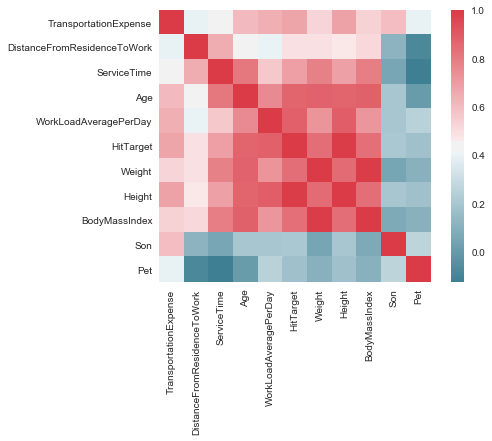

In [29]:
#Set the width and hieght of the plot
f, ax = plt.subplots(figsize=(7, 5))

#Generate correlation matrix
corr = df_corr.corr()

#Plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [30]:
#No 2 features is that much correlated to be dropped
df.drop(['Age','Height','Weight'], axis = 1, inplace = True)
cnames =  ["TransportationExpense", "DistanceFromResidenceToWork", "ServiceTime", "WorkLoadAveragePerDay","BodyMassIndex","Son","Pet"]

In [31]:
#Feature Scaling
# #Standarisation
for i in cnames:
   print(i)
   df[i] = (df[i] - df[i].mean())/df[i].std()

TransportationExpense
DistanceFromResidenceToWork
ServiceTime
WorkLoadAveragePerDay
BodyMassIndex
Son
Pet


In [32]:
#Drop ID column as it wont be of any requirement
df.drop(['ID'], axis = 1, inplace = True)


In [33]:
df.head()

,ReasonForAbsence,MonthOfAbsence,DayoftheWeek,Seasons,TransportationExpense,DistanceFromResidenceToWork,ServiceTime,WorkLoadAveragePerDay,HitTarget,DisciplinaryFailure,Education,Son,SocialDrinker,SocialSmoker,Pet,BodyMassIndex,AbsenteeismTimeInHours
0,26.000000,7.000000,3.000000,1.000000,1.163777,0.465945,0.174031,-0.170515,97.000000,0.0,1.0,0.984526,1.0,0.0,0.690525,0.654944,4.0
1,23.000000,7.000000,4.000000,1.000000,-0.286637,1.430074,1.259470,-0.170515,97.000000,0.0,1.0,-0.818399,1.0,0.0,-0.710502,0.785254,2.0
2,7.000000,7.000000,5.000000,1.000000,1.031921,-1.526588,0.391119,-0.170515,97.000000,0.0,1.0,0.984526,1.0,1.0,-0.710502,-0.126911,4.0
3,23.000000,7.000000,5.000000,1.000000,1.163777,0.465945,0.174031,-0.170515,97.000000,0.0,1.0,0.984526,1.0,0.0,0.690525,0.654944,2.0
4,8.666666,7.333333,3.333333,2.666667,-1.090958,-1.205212,-0.477233,0.223775,95.333331,0.0,1.0,-0.818399,0.0,0.0,-0.710502,0.264017,8.0


In [34]:
#Model
#Import Libraries
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

C:\Users\DELL\Miniconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [35]:
#PCA Analysis For Feature Selection
X = df.values[:, 0:16]
#X=scale(X)
y = df.values[:,16]
y=y.astype('int')
pca=PCA(n_components=10)
pca.fit(X)
X1=pca.fit_transform(X)
#print(pd.DataFrame(pca.components_))
var=pca.explained_variance_ratio_
var1=np.cumsum(np.round(var,decimals=4)*100)
print(var1)

[91.15 97.02 98.87 99.14 99.38 99.57 99.69 99.8  99.86 99.91]


In [36]:
PCA_df=(pd.DataFrame(pca.components_,columns=df.iloc[:,0:16].columns,index = ['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6','PC-7','PC-8','PC-9','PC-10']).abs().sum(axis=0))

In [37]:
PCA_df=PCA_df.to_frame().reset_index()
PCA_df=PCA_df.rename(columns={'index':'Cause',0:'Significance'})
PCA_df.columns

Index(['Cause', 'Significance'], dtype='object')

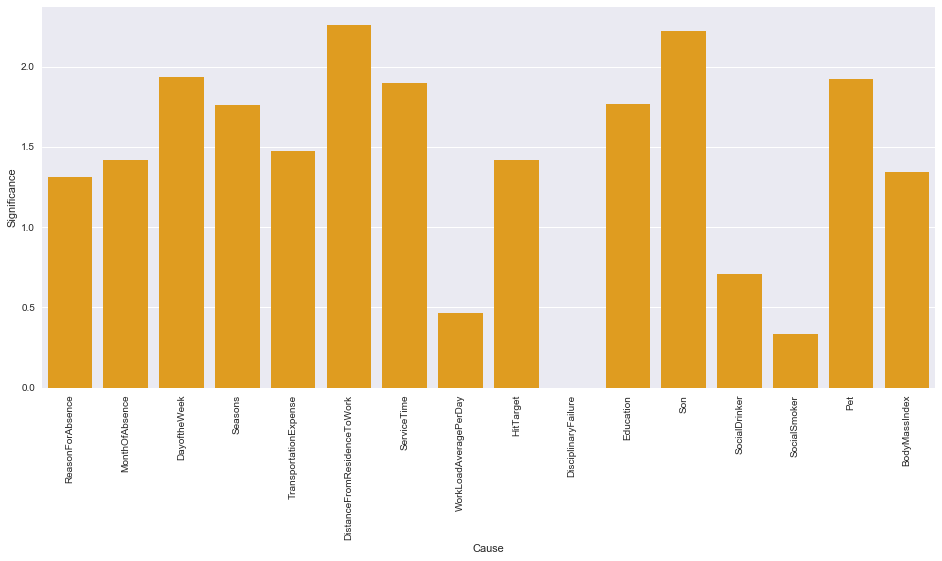

In [38]:
plt.figure(figsize=(16, 7))
plt.xticks(fontsize=10, rotation=90)
sns.barplot( x=PCA_df['Cause'],y=PCA_df['Significance'], color="orange" )

In [39]:
#Divide data into train and test

kf = KFold(n_splits=10,random_state=None,shuffle=True)
for train_index, test_index in kf.split(X1):
   X_train, X_test=X[train_index],X[test_index]
   y_train, y_test=y[train_index],y[test_index]

In [40]:
#Decision Tree
C50_model = tree.DecisionTreeClassifier(criterion='entropy').fit(X_train, y_train)

#predict new test cases
C50_Predictions = C50_model.predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,C50_Predictions))

3.633989866928797

In [41]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

RF_model = RandomForestClassifier(n_estimators = 20).fit(X_train, y_train)
RF_Predictions = RF_model.predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,RF_Predictions))

C:\Users\DELL\Miniconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


3.217598666159375

In [42]:
#KNN implementation
from sklearn.neighbors import KNeighborsClassifier

KNN_model = KNeighborsClassifier(n_neighbors = 7).fit(X_train, y_train)
KNN_Predictions = KNN_model.predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,KNN_Predictions))

2.6568446566202857

In [43]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB

#Naive Bayes implementation
NB_model = GaussianNB().fit(X_train, y_train)
NB_Predictions = NB_model.predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,NB_Predictions))

2.9530642111701733

In [44]:
#Linear Regression
linreg=LinearRegression()
linreg.fit(X_train, y_train)
Linear_Predictions=linreg.predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,Linear_Predictions))

2.9876956942071855